In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy import stats

In [2]:
DATA_DIR = "std_curves_06022020.csv"
df = pd.read_csv(DATA_DIR, sep=";")

In [3]:
df_list = np.array_split(df, 7)

In [4]:
data_dict = {}
for df in df_list:
    data_dict[df.iloc[0]["substance"]] = {"conc": np.array(df["concentration"], dtype=float), "abs": np.array(df["absorbance"], dtype=float), "usability": np.array(df["usable"], dtype=bool)}

C: R = 0.9953
R: R = 0.9734
H: R = 0.8607


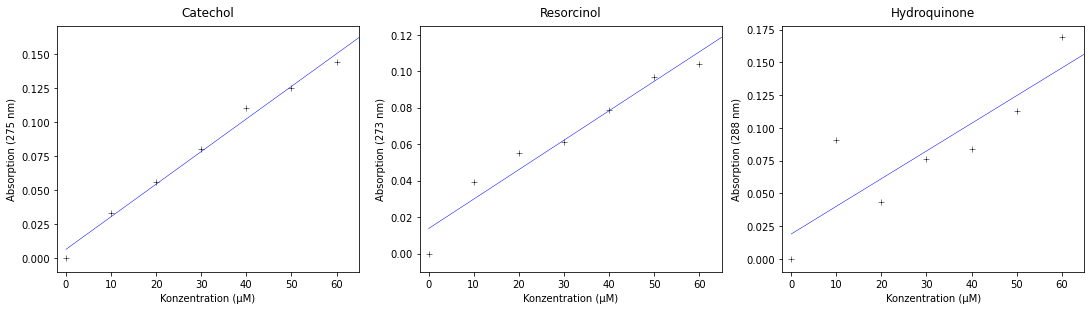

In [7]:
color_dict = {"C":"black", "R": "blue", "H": "orange"}
name_dict = {"C":"Catechol", "R": "Resorcinol", "H": "Hydroquinone"}
wavelength_dict = {"C":"275 nm", "R": "273 nm", "H": "288 nm"}


fig, axs= plt.subplots(1,3, sharex=True, figsize=(15,4))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
n=0
for substance, dictionary in data_dict.items():
    if n<3:
        ax=axs[n]
        n+=1
    if re.match(r"R|C|H",substance):
        """for index, usable in enumerate(dictionary["usability"]):
            if (index==10)&(dictionary["abs"][0]==0):
                dictionary["conc"] = np.delete(dictionary["conc"], index)
                dictionary["abs"] = np.delete(dictionary["abs"], index)
                dictionary["usability"] = np.delete(dictionary["usability"], index)
            if usable==False:
                dictionary["conc"] = np.delete(dictionary["conc"], index)
                dictionary["abs"] = np.delete(dictionary["abs"], index)
                dictionary["usability"] = np.delete(dictionary["usability"], index)"""
        slope, intercept, r_value, p_value, std_err = stats.linregress(dictionary["conc"], dictionary["abs"])
        ax.plot(dictionary["conc"][:], dictionary["abs"][:], "+", color="black", mew=0.5)
        ax.plot([0,65], [intercept, 65*slope+intercept], color="blue", linewidth=0.5)
        ax.set_ylim(ymin=-0.01)
        ax.set_xlim(xmin=-2, xmax=65)
        ax.set_ylabel("Absorption ({})".format(wavelength_dict[substance]))
        ax.set_xlabel("Konzentration (μM)")
        ax.set_title("{}".format(name_dict[substance]), pad=10)
        print("{}: R = {}".format(substance, round(r_value,4)))
fig.savefig("standardcurves.png".format(substance), dpi=600,  bbox_inches='tight', pad_inches=0)